In [1]:
import sympy 
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sl
import numpy as np
import seaborn as sns; sns.set()
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline
from scipy.integrate import quad
from scipy import integrate
from sympy import fft
from scipy.fftpack import fft

# Tarea 4

Con base a los métodos vistos en clase resuelva las siguientes dos preguntas

## (A) Integrales

* $\int_{0}^{1}x^{-1/2}\,\text{d}x$
* $\int_{0}^{\infty}e^{-x}\ln{x}\,\text{d}x$
* $\int_{0}^{\infty}\frac{\sin{x}}{x}\,\text{d}x$

In [98]:
def f(x):
    return x**(-0.5)

n=1000000

def Integrando1(f):
    x,y = np.linspace(0,1, num = n +1, retstep = True)
    return (5/4)*y*f(x[0] + f(x[-1])) + y*np.sum(f(x[1:-1]))

Integrando1(f)


1.9985403954911485

In [99]:
def f(x):
    return math.exp(-x)
 
def trapecio2(f, n, a, b):
    h = (b - a) / float(n)
    integrando = 0.5 * h * (f(a) + f(b))
    for i in range(1, int(n)):
        integrando = integrando + h * f(a + i * h)
    return integrando
 
a = 0
b = 10
n = 100
 
while(abs(trapecio2(f, n, a, b) - trapecio2(f, n * 4, a * 2, b * 2)) > 1e-6):
    n *= 4
    a *= 2
    b *= 2

trapecio2(f, n, a, b)


1.0000008138019307

In [100]:
def Integrando2(x):
   funcion = np.exp(-x)
   return funcion 
solucion2 = quad(Integrando2,0,np.inf)

solucion2

(1.0000000000000002, 5.842606996763696e-11)

In [101]:
Integrando3 = integrate.quad(lambda x : (np.sin(x))/x, 0, np.inf)[0]
print("valor exacto de la integral 3:", Integrando3)

valor exacto de la integral 3: 2.247867963468919


<ipython-input-101-0b70c1f926b8>:1: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Integrando3 = integrate.quad(lambda x : (np.sin(x))/x, 0, np.inf)[0]


In [102]:
n=100 
x = np.linspace(0.000001,n,1000001)

f = []
for i in range(len(x)):
    f.append(np.sin(x[i])/x[i])
    
f = np.array(f)

def integrate(in_x,ft_f)->float:
    
    calculo=0
    for i in range(len(x)-1):
        calculo = calculo + ((ft_f[i+1])+(ft_f[i]))*abs(in_x[i+1]-in_x[i])/2
    
    return(calculo)

integral_3 = integrate(x,f)

print(f" Integrando 3  {integral_3}")


 Integrando 3  1.5622244668962069


## (B) Fourier

Calcule la transformada rápida de Fourier para la función de la **Tarea 3 (D)** en el intervalo $[0,4]$ ($k$ máximo $2\pi n/L$ para $n=25$). Ajuste la transformada de Fourier para los datos de la **Tarea 3** usando el método de regresión exacto de la **Tarea 3 (C)** y compare con el anterior resultado. Para ambos ejercicios haga una interpolación y grafique para comparar.

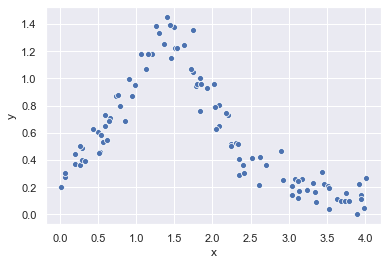

,x,y
0,0.065859,0.277413
1,0.020931,0.202239
2,0.070312,0.307369
3,0.206166,0.367530
4,0.286572,0.491144
...,...,...
95,3.922613,0.225565
96,3.898473,0.000000
97,3.952111,0.141005
98,3.939211,0.115500


In [10]:
df = pd.read_pickle(r"C:\Users\Camilo Rueda\Downloads\ex1.gz")
sns.scatterplot(x='x',y='y',data=df)
plt.show()
df

In [17]:
x = df["x"]
y = df["y"]


lx = []
ly = []
for i in range(len(x)):
    if x[i]<=1.5 :
        lx.append(x[i])
        ly.append(y[i])
        
        
x = np.array(lx)
y = np.array(ly)

def f(p,x): 
    return (p[0])/((x-p[1])**2 + p[2])**p[3]

def L_ajuste(p,x,y): 
    deltaY=f(p,x) - y
    return np.dot(deltaY,deltaY)/len(y)

Nf = 25

def a_j(j):
    global x, y
    k_j = 2*np.pi*j/4
    n_y = y*np.cos(k_j*x)
    return integrate.simpson(n_y, x)

def b_j(j):
    global x, y
    k_j = 2*np.pi*j/4
    n_y = y*np.sin(k_j*x)
    return integrate.simpson(n_y, x)
    
    

    
A_j = np.array([a_j(j) for j in range(Nf)])
B_j = np.array([b_j(j) for j in range(Nf)])


AttributeError: module 'scipy.integrate' has no attribute 'simpson'

In [13]:
x_tilde = np.linspace(0, 4, 10000) 
k_j = np. array([2*np.pi*j/4 for j in range(Nf)])
y_tilde = np.sum([  (A_j[j]*np.cos(k_j[j]*x_tilde)  +  B_j[j]*np.sin(k_j[j]*x_tilde)) for j in range(Nf)  ], axis=0)


NameError: name 'A_j' is not defined

In [6]:
plt.plot(x,y)
plt.plot(x_tilde, y_tilde)

NameError: name 'x' is not defined